In [9]:
from pipeline import GAL
from utils.dataset_wrapper import WrapperDataset
from sklearn.linear_model import LogisticRegression
from ref.ActiveLearning_OG import AL

data_object = WrapperDataset("wineQT.pkl")
dataset = data_object.dataset
input_dim = data_object.dim
output_dim = data_object.num_labels

print(dataset["available_pool_samples"].shape)

gal = GAL(dataset=dataset,
    classifier=LogisticRegression(),
    budget_per_iter=8,
    iterations=100,
    uncertainty_measures=["pagerank"],
    quantile=0.1,
    sim_metric="euclidean",
    use_gnn=True,
    gnn_epochs=5,
    input_dim=input_dim,
    gnn_hidden=32,
    output_dim=output_dim,
    plot=False,
    AL4GE=False,
    coef=None,
    n_clusters=4,)

res_gal = gal.run(plot=False)

selection_criteria = ['random', 'custom']
accuracy_scores_dict = {}
for criterion in selection_criteria:
	AL_class = AL(dataset=dataset,
			   selection_criterion=criterion,
			   iterations=100,
			   budget_per_iter=8,
			   train_limit=int(1e6),)
	accuracy_scores_dict[criterion] = AL_class.run_pipeline()

(800, 11)
SimpleGNN(
  (encoder_conv1): GCNConv(11, 16)
  (encoder_conv2): SAGEConv(16, 16, aggr=sum)
  (decoder): Classifier(
    (model): Sequential(
      (0): Linear(in_features=16, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=128, bias=True)
      (3): ReLU()
      (4): Linear(in_features=128, out_features=6, bias=True)
    )
    (softmax): Softmax(dim=-1)
  )
)


100%|██████████| 100/100 [00:06<00:00, 15.17it/s, GAL_Iteration=99, GAL_Accuracy=0.555, GAL_LR test acc=0.651, GNN Train Acc=0.685, GNN Test Acc=0.555]


Accuracy: 0.59
----------------------------------------
Accuracy: 0.607
----------------------------------------
Accuracy: 0.62
----------------------------------------
Accuracy: 0.598
----------------------------------------
Accuracy: 0.603
----------------------------------------
Accuracy: 0.603
----------------------------------------
Accuracy: 0.607
----------------------------------------
Accuracy: 0.62
----------------------------------------
Accuracy: 0.603
----------------------------------------
Accuracy: 0.59
----------------------------------------
Accuracy: 0.576
----------------------------------------
Accuracy: 0.59
----------------------------------------
Accuracy: 0.598
----------------------------------------
Accuracy: 0.594
----------------------------------------
Accuracy: 0.598
----------------------------------------
Accuracy: 0.607
----------------------------------------
Accuracy: 0.607
----------------------------------------
Accuracy: 0.62
---------------------

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("results/results.csv")
df["dataset"] = df["dataset"].apply(lambda x: x.split(".")[0])
df["uncertainty_measures"] = df["uncertainty_measures"].apply(lambda x: "AGGR" if x not in ["area_variance", "pagerank", "density_kmean", "entropy_e", "AL4GE"] else x)
_dsts = set(df["dataset"])
df

,dataset,uncertainty_measures,AL4GE,GNN_avg,LR_avg,aggr_avg,custom_avg,random_avg
0,iris,AGGR,False,0.848,0.878,0.851,0.868,0.832
1,iris,area_variance,False,0.878,0.862,0.883,0.868,0.832
2,iris,pagerank,False,0.833,0.813,0.837,0.868,0.832
3,iris,density_kmean,False,0.854,0.860,0.854,0.868,0.832
4,iris,entropy_e,False,0.860,0.883,0.862,0.868,0.832
5,iris,AL4GE,True,0.862,0.879,0.871,0.868,0.832
6,wineQT,area_variance,False,0.520,0.589,0.521,0.588,0.603
7,wineQT,entropy_e,False,0.519,0.637,0.521,0.588,0.603
8,wineQT,pagerank,False,0.513,0.597,0.514,0.588,0.603
9,wineQT,density_kmean,False,0.511,0.621,0.515,0.588,0.603


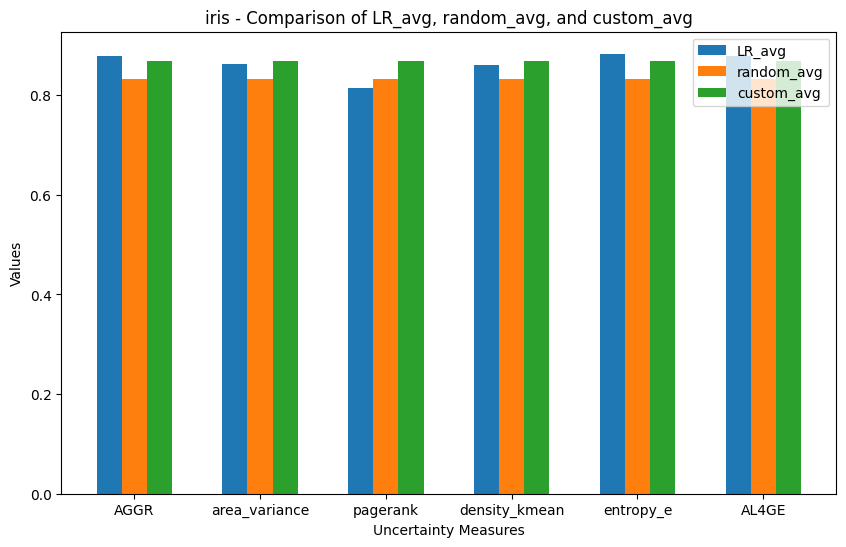

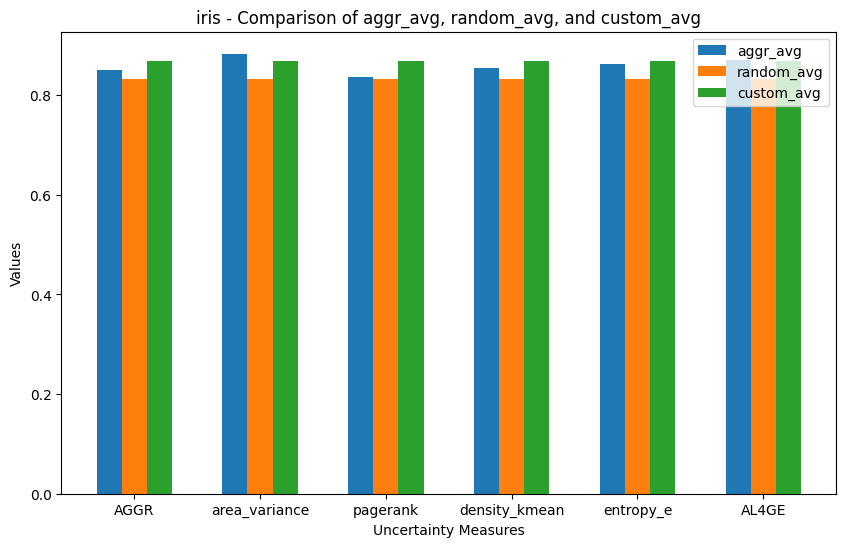

In [24]:
for dataset in df['dataset'].unique():
    # Filter data for the current dataset
    subset = df[df['dataset'] == dataset]
    
    # Set the width for bars and positions on x-axis
    bar_width = 0.2
    x = np.arange(len(subset))
    
    # Plot 1: LR_avg, random_avg, custom_avg
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - bar_width, subset['LR_avg'], width=bar_width, label='LR_avg')
    ax.bar(x, subset['random_avg'], width=bar_width, label='random_avg')
    ax.bar(x + bar_width, subset['custom_avg'], width=bar_width, label='custom_avg')
    
    ax.set_xticks(x)
    ax.set_xticklabels(subset['uncertainty_measures'])
    ax.set_xlabel('Uncertainty Measures')
    ax.set_ylabel('Values')
    ax.set_title(f'{dataset} - Comparison of LR_avg, random_avg, and custom_avg')
    ax.legend()
    plt.show()
    
    # Plot 2: aggr_avg, random_avg, custom_avg
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - bar_width, subset['aggr_avg'], width=bar_width, label='aggr_avg')
    ax.bar(x, subset['random_avg'], width=bar_width, label='random_avg')
    ax.bar(x + bar_width, subset['custom_avg'], width=bar_width, label='custom_avg')
    
    ax.set_xticks(x)
    ax.set_xticklabels(subset['uncertainty_measures'])
    ax.set_xlabel('Uncertainty Measures')
    ax.set_ylabel('Values')
    ax.set_title(f'{dataset} - Comparison of aggr_avg, random_avg, and custom_avg')
    ax.legend()
    plt.show()
    break